<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-December/blob/main/22-04-13-Keras/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet: https://www.kaggle.com/datasets/shivam2503/diamonds

In [2]:
! unzip ./diamonds.csv.zip

Archive:  ./diamonds.csv.zip
  inflating: diamonds.csv            


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [17]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [19]:
from sklearn.preprocessing import OrdinalEncoder

cut =  ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

oe = OrdinalEncoder(categories = [cut, color, clarity])
oe.fit_transform(df[['cut', 'color', 'clarity']])

array([[4., 1., 1.],
       [3., 1., 2.],
       [1., 1., 4.],
       ...,
       [2., 0., 2.],
       [3., 4., 1.],
       [4., 0., 1.]])

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

real_num = ['carat','depth','table', 'x','y','z']
cl = ColumnTransformer([
                        ('1', OrdinalEncoder(categories = [cut, color, clarity]), ['cut', 'color', 'clarity']),
                        ('2', StandardScaler(),real_num)
])

In [23]:
Y = df['price']
X = df.drop('price', axis=1)

X = cl.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin = LinearRegression()
lin.fit(xtrain, ytrain)

mean_squared_error(ytest, lin.predict(xtest))

1569472.6633326774

# Keras

In [31]:
(X.shape[1],)

(9,)

In [28]:
import tensorflow as tf

In [59]:
model = tf.keras.Sequential([
          tf.keras.Input(shape=(X.shape[1],), name='input'),
          tf.keras.layers.Dense(20, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_1'),
          tf.keras.layers.Dense(10, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_2'),
          tf.keras.layers.Dense(1, activation='linear', name='output'),
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 20)                200       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


# Layers



*   `get_layer()`
*   `get_weights`
*   `set_weights`



In [43]:
# model.layers[1].name
model.get_layer('dense_2').name

'dense_2'

In [44]:
model.get_layer('dense_2').trainable = False

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 20)                200       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 421
Trainable params: 211
Non-trainable params: 210
_________________________________________________________________


In [46]:
model.trainable = True
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 20)                200       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [50]:
weights, biases = model.get_layer('dense_2').get_weights()
weights.shape, biases.shape

((20, 10), (10,))

In [52]:
model.get_layer('dense_2').set_weights((weights, biases))

# Training

In [62]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)

model.compile(
    optimizer = optimizer,
    loss = 'mse',
    metrics = ['mae']
)

In [63]:
history = model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/20
1265/1265 [==============================] - 3s 2ms/step - loss: 3541021.2500 - mae: 1052.9180 - val_loss: 1621820.2500 - val_mae: 651.6838
Epoch 2/20
1265/1265 [==============================] - 3s 2ms/step - loss: 908602.0625 - mae: 587.3908 - val_loss: 1450208.3750 - val_mae: 569.6687
Epoch 3/20
1265/1265 [==============================] - 3s 2ms/step - loss: 830691.3125 - mae: 540.2642 - val_loss: 1317816.1250 - val_mae: 539.1340
Epoch 4/20
1265/1265 [==============================] - 3s 2ms/step - loss: 792917.4375 - mae: 516.3724 - val_loss: 1218528.1250 - val_mae: 517.8723
Epoch 5/20
1265/1265 [==============================] - 3s 2ms/step - loss: 758870.8750 - mae: 499.4666 - val_loss: 1110867.3750 - val_mae: 498.8023
Epoch 6/20
1265/1265 [==============================] - 3s 2ms/step - loss: 732594.9375 - mae: 487.2462 - val_loss: 1045552.6250 - val_mae: 496.1373
Epoch 7/20
1265/1265 [==============================] - 3s 2ms/step - loss: 717453.3125 - mae: 479.0413 

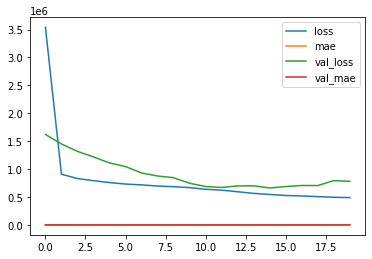

In [64]:
pd.DataFrame(history.history).plot()

# CallBack

https://keras.io/api/callbacks/

In [69]:
def ee():
    print('ee')

lambda_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_begin=None,
    on_epoch_end=ee,
    on_batch_begin=None,
    on_batch_end=None,
    on_train_begin=None,
    on_train_end=None,
)

class CustomCallback(tf.keras.callbacks.Callback):
    # def on_epoch_begin():
    #     pass
    def on_epoch_end(self, epoch, logs):
        print(logs)
        
    # def on_batch_begin(**kwarg):
    #     pass
    # def on_batch_end(**kwarg):
    #     pass
    # def on_train_begin(**kwarg):
    #     pass
    # def on_train_end(**kwarg):
    #     pass

In [ ]:
history = model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_data=(xtest, ytest), callbacks=[CustomCallback()])

In [74]:
model = tf.keras.Sequential([
        tf.keras.Input(shape=(X.shape[1],), name='input'),
        tf.keras.layers.Dense(20, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_1'),
        tf.keras.layers.Dense(10, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_2'),
        tf.keras.layers.Dense(1, activation='linear', name='output'),
])
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

In [76]:
early_stoping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=100000,
    patience=5,
    restore_best_weights=False,
)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    './models/',
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,# weights, optimizer
)

history = model.fit(xtrain, ytrain, epochs=1000, batch_size=32, validation_data=(xtest, ytest), callbacks=[early_stoping, model_checkpoint])

Epoch 1/1000
1265/1265 [==============================] - 5s 4ms/step - loss: 811799.1875 - mae: 535.6156 - val_loss: 1397307.2500 - val_mae: 547.8466
Epoch 2/1000
1265/1265 [==============================] - 5s 4ms/step - loss: 805493.4375 - mae: 530.7153 - val_loss: 1389875.6250 - val_mae: 544.8214
Epoch 3/1000
1265/1265 [==============================] - 4s 3ms/step - loss: 797423.6250 - mae: 526.8047 - val_loss: 1374737.2500 - val_mae: 539.5556
Epoch 4/1000
1265/1265 [==============================] - 3s 2ms/step - loss: 792061.5000 - mae: 523.0528 - val_loss: 1363270.1250 - val_mae: 536.1749
Epoch 5/1000
1265/1265 [==============================] - 3s 2ms/step - loss: 784844.8750 - mae: 519.5076 - val_loss: 1356152.2500 - val_mae: 533.6412
Epoch 6/1000
1265/1265 [==============================] - 3s 2ms/step - loss: 780153.4375 - mae: 516.4471 - val_loss: 1331084.6250 - val_mae: 529.4615


# Functional API

https://www.tensorflow.org/api_docs/python/tf/keras/layers?version=nightly

In [85]:
# model = tf.keras.Sequential([
#         tf.keras.Input(shape=(X.shape[1],), name='input'),
#         tf.keras.layers.Dense(20, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_1'),
#         tf.keras.layers.Dense(10, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_2'),
#         tf.keras.layers.Dense(20, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_3'),
#         tf.keras.layers.Dense(1, activation='linear', name='output'),
# ])

model_input = tf.keras.Input(shape=(X.shape[1],), name='input')
dense_1 = tf.keras.layers.Dense(20, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_1')(model_input)
dense_2 = tf.keras.layers.Dense(20, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_2')(dense_1)
dense_3 = tf.keras.layers.Dense(10, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_3')(tf.keras.layers.add([dense_1, dense_2]))
model_output = tf.keras.layers.Dense(1, activation='linear', name='output')(dense_3)

model = tf.keras.Model(inputs=[model_input], outputs=[model_output])

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 9)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 20)           200         ['input[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 20)           420         ['dense_1[0][0]']                
                                                                                                  
 add_2 (Add)                    (None, 20)           0           ['dense_1[0][0]',                
                                                                  'dense_2[0][0]']          

In [87]:
model_input = tf.keras.Input(shape=(X.shape[1],), name='input')
dense_1 = tf.keras.layers.Dense(20, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_1')(model_input)
dense_2 = tf.keras.layers.Dense(10, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_2')(dense_1)
concat = tf.keras.layers.Concatenate()([dense_1, dense_2])
dense_3 = tf.keras.layers.Dense(5, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_3')(concat)
model_output = tf.keras.layers.Dense(1, activation='linear', name='output')(dense_3)

model = tf.keras.Model(inputs=[model_input], outputs=[model_output])

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 9)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 20)           200         ['input[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 10)           210         ['dense_1[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 30)           0           ['dense_1[0][0]',                
                                                                  'dense_2[0][0]']          

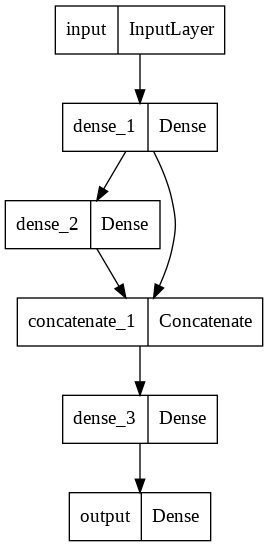

In [88]:
tf.keras.utils.plot_model(model)

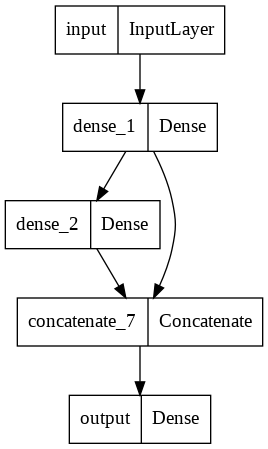

In [96]:
model_input = tf.keras.Input(shape=(X.shape[1],), name='input')

dense_1 = tf.keras.layers.Dense(20, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_1')(model_input)
dense_2 = tf.keras.layers.Dense(10, activation='leaky_relu', kernel_initializer='he_uniform', name='dense_2')(dense_1)
concat = tf.keras.layers.Concatenate()([dense_1, dense_2])
model_output = tf.keras.layers.Dense(1, activation='linear', name='output')(concat)

model = tf.keras.Model(inputs=[model_input], outputs=[model_output, concat])

model.compile(
    optimizer = 'adam',
    loss = ['mse'],
    metrics = ['mae']
)

tf.keras.utils.plot_model(model)

In [97]:
history = model.fit(xtrain, ytrain, epochs=5, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/5
1265/1265 [==============================] - 4s 2ms/step - loss: 19443602.0000 - output_loss: 19443602.0000 - output_mae: 2841.3425 - concatenate_7_mae: 3896.1292 - val_loss: 6633373.5000 - val_output_loss: 6633373.5000 - val_output_mae: 1785.1199 - val_concatenate_7_mae: 3919.7078
Epoch 2/5
1265/1265 [==============================] - 3s 2ms/step - loss: 4023764.2500 - output_loss: 4023764.2500 - output_mae: 1377.2480 - concatenate_7_mae: 3876.2539 - val_loss: 3077297.0000 - val_output_loss: 3077297.0000 - val_output_mae: 1138.7142 - val_concatenate_7_mae: 3927.1462
Epoch 3/5
1265/1265 [==============================] - 3s 2ms/step - loss: 2166064.7500 - output_loss: 2166064.7500 - output_mae: 1005.4685 - concatenate_7_mae: 3881.5818 - val_loss: 2239321.5000 - val_output_loss: 2239321.5000 - val_output_mae: 929.3035 - val_concatenate_7_mae: 3929.8960
Epoch 4/5
1265/1265 [==============================] - 3s 2ms/step - loss: 1497824.6250 - output_loss: 1497824.6250 - output_m

# BatchNorm

In [109]:
model = tf.keras.Sequential([
        tf.keras.Input(shape=(X.shape[1],), name='input'),
        
        tf.keras.layers.Dense(20, kernel_initializer='he_uniform', name='dense_1', kernel_regularizer=tf.keras.regularizers.L1(l1=0.02)),
        tf.keras.layers.BatchNormalization(name='batchnorm1'),
        tf.keras.layers.ReLU(),

        tf.keras.layers.Dropout(rate=0.2), # previous layer is affected
        
        tf.keras.layers.Dense(10, kernel_initializer='he_uniform', name='dense_2', kernel_regularizer='l2'),
        tf.keras.layers.BatchNormalization(name='batchnorm2'),
        tf.keras.layers.ReLU(),

        tf.keras.layers.Dropout(rate=0.2), # previous layer is affected

        tf.keras.layers.Dense(1, activation='linear', name='output'),
])

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 20)                200       
                                                                 
 batchnorm1 (BatchNormalizat  (None, 20)               80        
 ion)                                                            
                                                                 
 re_lu_6 (ReLU)              (None, 20)                0         
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 batchnorm2 (BatchNormalizat  (None, 10)               40        
 ion)                                                

In [110]:
history = model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/20
1265/1265 [==============================] - 6s 3ms/step - loss: 31092216.0000 - mae: 3911.5173 - val_loss: 31323378.0000 - val_mae: 3943.1685
Epoch 2/20
1265/1265 [==============================] - 3s 3ms/step - loss: 30429744.0000 - mae: 3870.1997 - val_loss: 30414290.0000 - val_mae: 3887.7966
Epoch 3/20
1265/1265 [==============================] - 3s 3ms/step - loss: 29355664.0000 - mae: 3799.7788 - val_loss: 29083384.0000 - val_mae: 3803.1350
Epoch 4/20
1265/1265 [==============================] - 3s 2ms/step - loss: 27960278.0000 - mae: 3705.4343 - val_loss: 27489924.0000 - val_mae: 3698.7102
Epoch 5/20
1265/1265 [==============================] - 3s 3ms/step - loss: 26221450.0000 - mae: 3584.6946 - val_loss: 25511474.0000 - val_mae: 3564.4148
Epoch 6/20
1265/1265 [==============================] - 3s 3ms/step - loss: 24265120.0000 - mae: 3440.2009 - val_loss: 23339488.0000 - val_mae: 3406.4849
Epoch 7/20
1265/1265 [==============================] - 3s 2ms/step - loss: 